In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

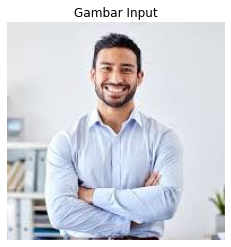

In [4]:
# Ganti 'input.jpg' dengan path ke gambar Anda
image_path = 'input.jpg'
img = Image.open(image_path)

# Menampilkan gambar input
plt.imshow(img)
plt.axis('off')  # Menyembunyikan sumbu
plt.title('Gambar Input')
plt.show()


In [5]:
img_array = np.array(img)
print("Shape of image array:", img_array.shape)  # Menampilkan dimensi array


Shape of image array: (193, 193, 3)


In [6]:
# Memeriksa apakah gambar dalam format RGB
if img_array.shape[2] == 3:
    # Menghitung nilai grayscale
    grayscale = 0.2989 * img_array[:, :, 0] + 0.5870 * img_array[:, :, 1] + 0.1140 * img_array[:, :, 2]
    grayscale = grayscale.astype(np.uint8)  # Mengonversi menjadi tipe uint8
else:
    print("Gambar tidak dalam format RGB.")


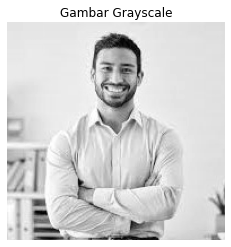

Gambar grayscale disimpan di: output.jpg


In [7]:
# Menyimpan gambar grayscale
grayscale_img = Image.fromarray(grayscale)
output_path = 'output.jpg'  # Ganti dengan path yang diinginkan
grayscale_img.save(output_path)

# Menampilkan gambar grayscale
plt.imshow(grayscale_img, cmap='gray')
plt.axis('off')  # Menyembunyikan sumbu
plt.title('Gambar Grayscale')
plt.show()

print(f"Gambar grayscale disimpan di: {output_path}")


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops

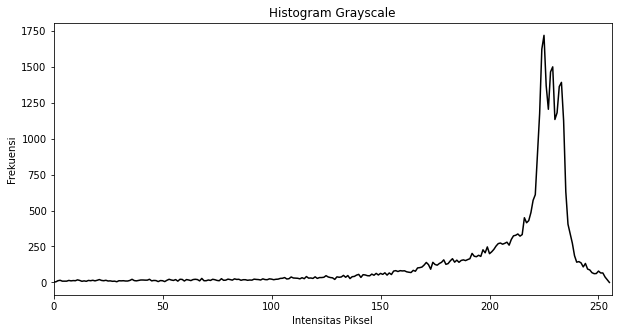

In [14]:
# Ekstraksi fitur: Histogram
histogram, bins = np.histogram(grayscale.flatten(), bins=256, range=[0, 256])

# Menampilkan histogram
plt.figure(figsize=(10, 5))
plt.title('Histogram Grayscale')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')
plt.xlim([0, 256])
plt.plot(histogram, color='black')
plt.show()


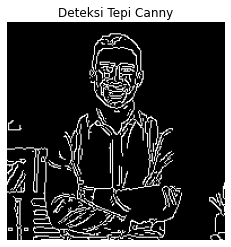

In [15]:
# Menggunakan OpenCV untuk deteksi tepi
edges = cv2.Canny(grayscale, 100, 200)

# Menampilkan hasil deteksi tepi
plt.imshow(edges, cmap='gray')
plt.axis('off')  # Menyembunyikan sumbu
plt.title('Deteksi Tepi Canny')
plt.show()


In [16]:
from skimage.feature import greycomatrix, greycoprops

# Menghitung GLCM
glcm = greycomatrix(grayscale, distances=[1], angles=[0], symmetric=True, normed=True)

# Ekstraksi fitur dari GLCM
contrast = greycoprops(glcm, 'contrast')[0, 0]
dissimilarity = greycoprops(glcm, 'dissimilarity')[0, 0]
homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]
energy = greycoprops(glcm, 'energy')[0, 0]
correlation = greycoprops(glcm, 'correlation')[0, 0]
entropy = -np.sum(histogram * np.log2(histogram + np.finfo(float).eps))  # Menghitung entropi

print(f"Kontras: {contrast}, Homogenitas: {homogeneity}, Energi: {energy}, Entropi: {entropy}")


Kontras: 296.4019591968911, Homogenitas: 0.4374688122229484, Energi: 0.08387818186867128, Entropi: -324730.41825446044


Jumlah kontur yang ditemukan: 97


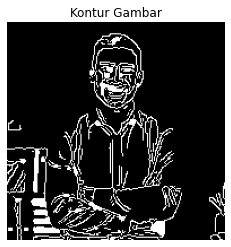

In [17]:
# Menghitung kontur
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Menampilkan jumlah kontur yang ditemukan
print(f"Jumlah kontur yang ditemukan: {len(contours)}")

# Menggambar kontur pada gambar
contour_img = np.zeros_like(grayscale)
cv2.drawContours(contour_img, contours, -1, (255), thickness=cv2.FILLED)

plt.imshow(contour_img, cmap='gray')
plt.axis('off')
plt.title('Kontur Gambar')
plt.show()


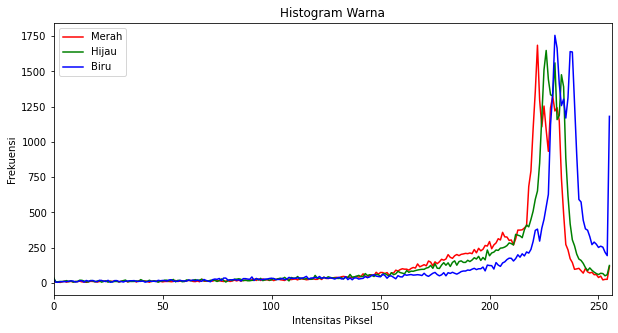

In [18]:
# Menghitung histogram untuk setiap saluran warna
r_hist, _ = np.histogram(img_array[:, :, 0], bins=256, range=[0, 256])
g_hist, _ = np.histogram(img_array[:, :, 1], bins=256, range=[0, 256])
b_hist, _ = np.histogram(img_array[:, :, 2], bins=256, range=[0, 256])

plt.figure(figsize=(10, 5))
plt.title('Histogram Warna')
plt.xlabel('Intensitas Piksel')
plt.ylabel('Frekuensi')
plt.xlim([0, 256])
plt.plot(r_hist, color='red', label='Merah')
plt.plot(g_hist, color='green', label='Hijau')
plt.plot(b_hist, color='blue', label='Biru')
plt.legend()
plt.show()
